# Image Edit with MLX Server

This notebook demonstrates how to use the MLX Server with OpenAI-compatible API for image generation tasks using the `/v1/images/edits` endpoint.

## Setup and Imports

First, we'll import the necessary libraries and establish a connection to the MLX Server.


In [ ]:
# Import the OpenAI client for API communication
from openai import OpenAI

# Connect to the local MLX Server with OpenAI-compatible API
client = OpenAI(
    base_url="http://localhost:8080/v1",
    api_key="fake-api-key",
)

In [17]:
# Required for image processing and display
from PIL import Image
import base64
from io import BytesIO
from IPython.display import display, HTML

In [21]:
def display_image_from_b64(b64_json):
    """
    Display an image from base64-encoded JSON data.
    
    Args:
        b64_json: Base64-encoded image data
    """
    # Decode the base64 string
    image_data = base64.b64decode(b64_json)
    
    # Convert to PIL Image
    image = Image.open(BytesIO(image_data))
    
    # Display the image
    display(image)
    
    return image

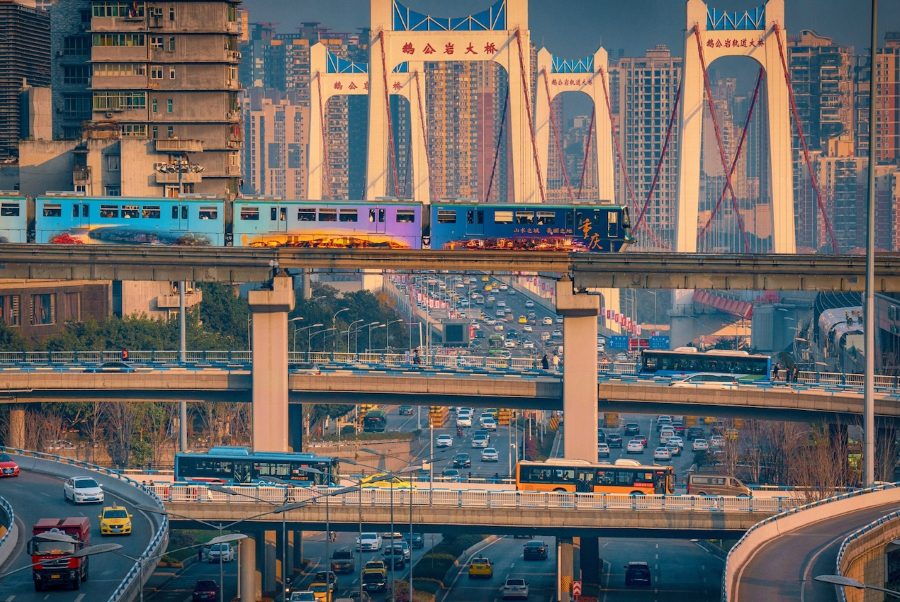

In [22]:
original_image = Image.open("images/china.png")
display(original_image)

Edited image:


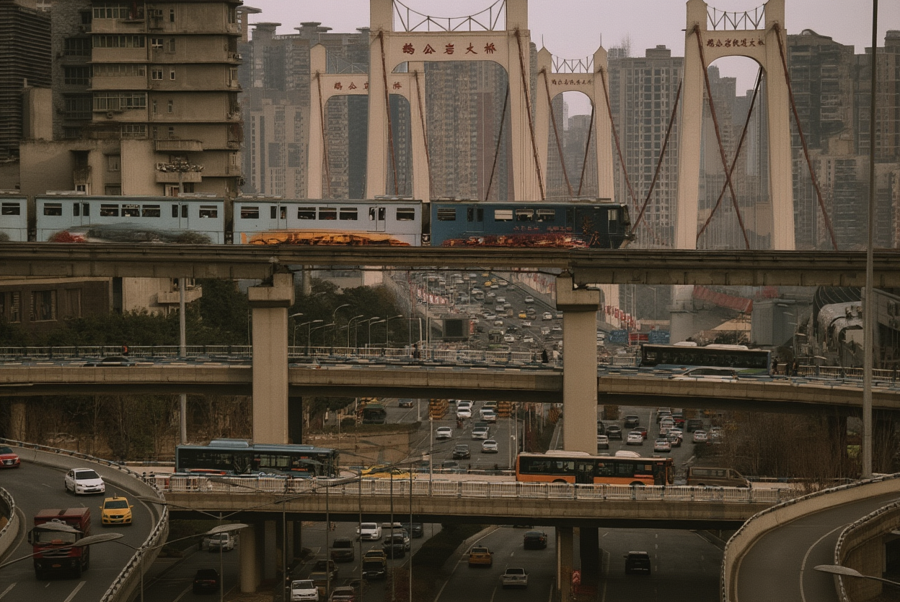

Image created at: 1755401447


In [23]:
prompt = "make it like a photo in 1800s"

result = client.images.edit(
    model="flux-kontext-dev",
    image=open("images/china.png", "rb"),
    prompt=prompt
)

image_base64 = result.data[0].b64_json

# Display the edited image
print("Edited image:")
image = display_image_from_b64(image_base64)
print(f"Image created at: {result.created}")